<a href="https://colab.research.google.com/github/hansonnguy/MAT-421/blob/main/Module_B_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

HW 2 - Hanson Nguyen

# **17.1 Interpolation Problem Statement**


---

For an independent data set $\{x_i\}$ and a corresponding dependent data set $\{y_i\}$ for $i = 1,2,3,\dots$, we want to generate an interpolation function $\hat{y}(x)$ such that $\hat{y}(x_i) = y_i$. In doing so, we can then use $\hat{x}$ to predict other values of $x$ that might not be in the original data set. Interpolation differs from regression as it is not based off of a model. However, we can still interpret the quality of the interpolation function by understanding the context of the data set.  

# **17.2 Linear Interpolation**


---

In linear interpolation, the point of interest is estimated to be on the line formed by the two data points it lies between. That is, $\hat{y}(x) = \frac{y_{i+1}-y_i}{x_{i+1}-x_i}(x-x_i)$ for $x_i < x < x_{i+1}$ if the data set $\{x_i\}$ is in ascending order.

For instance, the linear interpolation of $x = 2.4$ for the data $x = [1,2,3]$ and $y = [4,1,3]$ is $\hat{y}(2.4) = \frac{3-1}{3-2}(2.4-1) = 1.8$

In [1]:
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [41]:
x = np.arange(15)
y = np.sin(x)
x_int = 8.5

f = interp1d(x, y)
y_hat = f(x_int)
print(y_hat)

0.7007383659325692


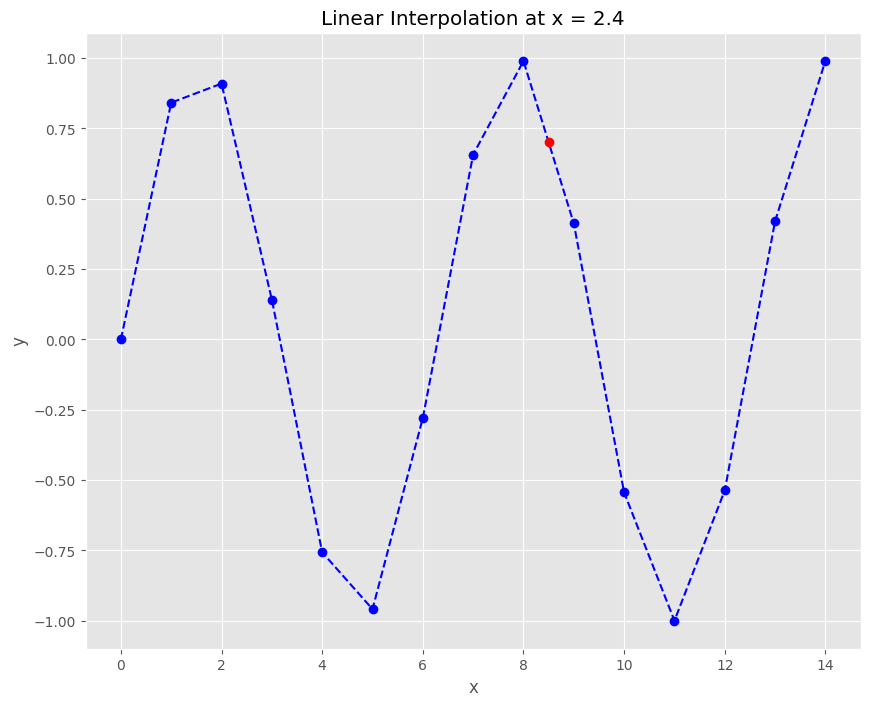

In [42]:
# show that the interpolated data point in on the line formed by the two points it is between

plt.figure(figsize = (10,8))
plt.plot(x, y, '--ob')
plt.plot(x_int, y_hat, 'ro')
plt.title('Linear Interpolation at x = 2.4')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# **17.3 Cubic Spline Interpolation**


---

In the cubic spine interpolation function, we assume that points $(x_i,y_i)$ are joined to $(x_{i+1}, y_{i+1})$ by a cubic function, which we denote as $S_i(x) = a_ix^3 + b_ix^2 + c_ix + d_i$. To generate the interpolation function, we have to solve for all of the coefficients. Since there are $4$ coefficients for $n-1$ equations, where $n$ is the number of data points, we will need to have $4(n-1)$ equations. The following are how we obtain these equations:

Ensure data points are accurate in the function, (2(n-1) equations)
1.   $S_i(x_i) = y_i$
2.   $S_{i+1}(x_i) = y_{i+1}$

Ensure that the function is continuous in the first and second derivative (2(n-2) equations)

3.  $S'_i(x_{i+1}) = S'_{i+1}(x_{i+1})$
4.  $S''_i(x_{i+1}) = S''_{i+1}(x_{i+1})$

Enforce $2$ extra conditions (typically boundary conditions that force the end points to be linear)

5.  $S''_1(x_1) = 0$
6.  $S''_{n-1}(x_n) = 0$

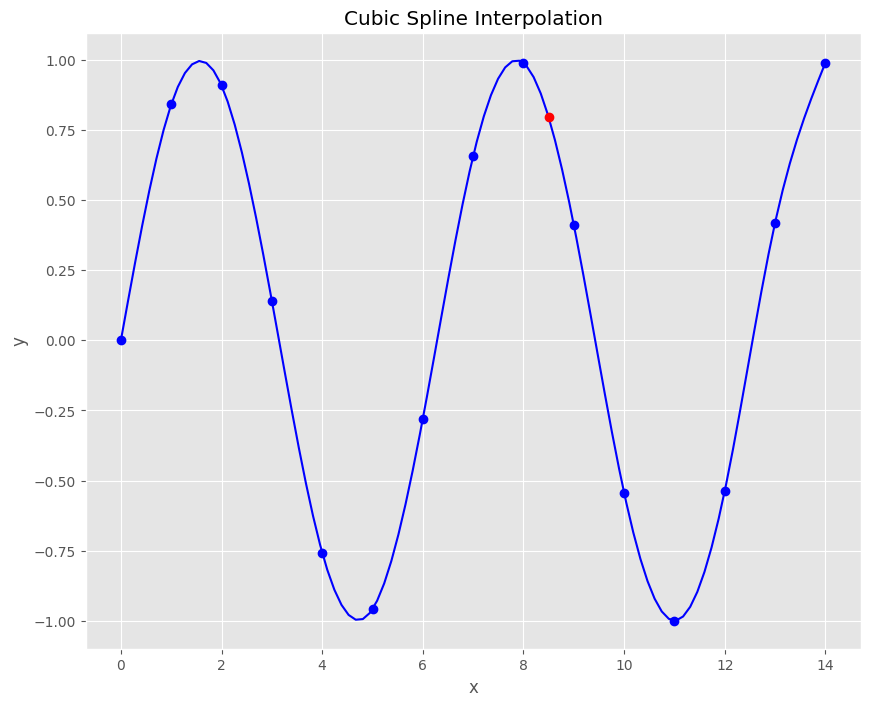

In [43]:
# We can first implement the built in function in python. Here, we will interpolate the same data as before

from scipy.interpolate import CubicSpline
import numpy as np

# use bc_type = 'natural' adds the constraints as we described above for #5 and #6
f_3 = CubicSpline(x, y, bc_type='natural')
x_new = np.linspace(min(x), max(x), 100)
y_new = f_3(x_new)
y_hat_3 = f_3(x_int)

plt.figure(figsize = (10,8))
plt.plot(x_new, y_new, 'b')
plt.plot(x, y, 'bo')
plt.plot(x_int, y_hat_3, 'ro')
plt.title('Cubic Spline Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [54]:
# Let's look at the error between each of the interpolations at x_int

error_cubic = abs(y_hat_3 - np.sin(x_int)) / np.sin(x_int) * 100
error_linear = abs(y_hat - np.sin(x_int)) / np.sin(x_int) * 100
print('Cubic error: ' + f"{error_cubic:.2f}" + '%')
print('Linear error: ' + f"{error_linear:.2f}" + '%')

Cubic error: 0.32%
Linear error: 12.24%


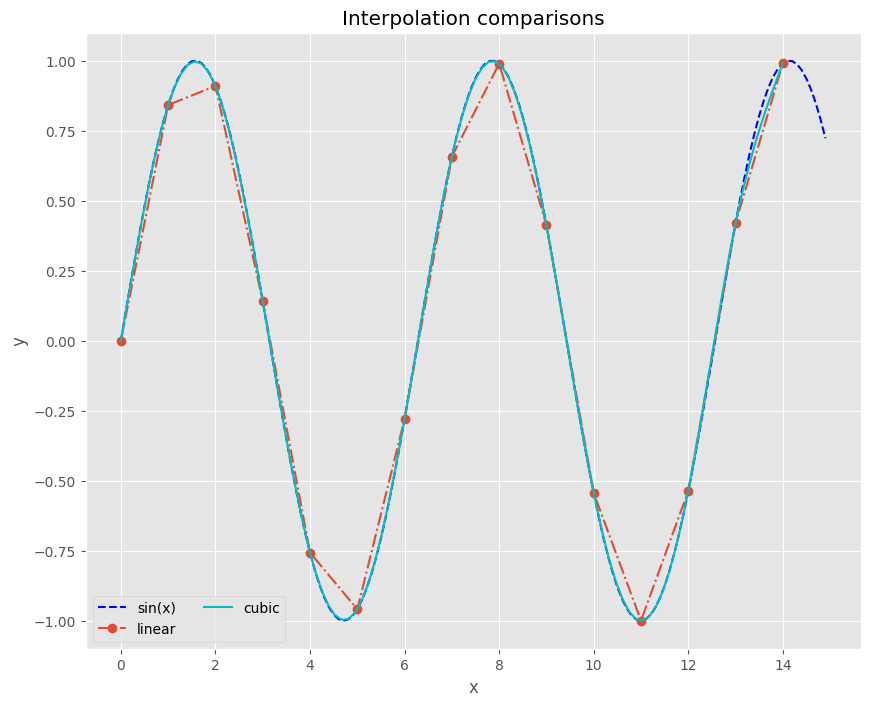

In [67]:
# Finally, we can compare the linear interpolation, cubic interpolation, and sin(x) functions:

plt.figure(figsize = (10,8))
plt.plot(np.arange(0,15,0.1), np.sin(np.arange(0,15,0.1)), '--b', label = 'sin(x)')
plt.plot(x, y, 'o-.', label = 'linear')
plt.plot(x_new, y_new, 'c', label = 'cubic')
plt.title('Interpolation comparisons')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='lower left', ncol=2)
plt.show()